In [1]:
import phate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from  Data_Selection import *

In [25]:
# Load CSV into a DataFrame
file = 'df_main.csv'
data = pd.read_csv(file)

selected_data, combined_equal_data  = data_selector(7200, file)
datapoint_selection = combined_equal_data[combined_equal_data.iloc[:, 5].isin([2.0, 2.5, 3.0])]
data_to_run = datapoint_selection.drop(datapoint_selection.columns[[5, 6]], axis=1) 
print(datapoint_selection)
print(data_to_run)

           TBX6       BRA      CDX2      SOX2      SOX1  timepoint  sample
0      0.712941  0.245024  1.804050  2.118150  0.748812        2.0       2
1      0.396271  0.123065  1.012057  2.676406  0.521711        2.0       2
2      0.647942  0.200438  1.300215  5.706961  0.646797        2.0       2
3      0.425355  0.157897  0.854942  1.748533  0.441205        2.0       2
4      0.381848  0.096692  0.729118  0.508345  0.481436        2.0       2
...         ...       ...       ...       ...       ...        ...     ...
21595  0.812111  0.764204  1.129056  0.385295  1.301366        3.0      11
21596  0.495233  0.187916  1.139577  2.033911  0.578681        3.0       9
21597  0.553439  0.221958  1.128493  1.629033  0.811796        3.0      10
21598  0.460848  0.162025  1.143683  2.007609  1.319768        3.0      10
21599  0.955001  1.879147  4.611071  0.578211  1.295751        3.0      11

[21600 rows x 7 columns]
           TBX6       BRA      CDX2      SOX2      SOX1
0      0.712941  0

In [26]:
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(selected_data)

Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.53 seconds.
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 3.68 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.33 seconds.
    Calculating KMeans...
    Calculated KMeans in 5.12 seconds.
  Calculated landmark operator in 9.30 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 3.32 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.94 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.65 seconds.
Calculated PHATE in 19.90 seconds.


In [27]:
phate_op = phate.PHATE()
data_phate_1 = phate_op.fit_transform(data_to_run)

Calculating PHATE...
  Running PHATE on 21600 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.88 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.94 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.19 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.01 seconds.
  Calculated landmark operator in 4.64 seconds.
  Calculating optimal t...
    Automatically selected t = 30
  Calculated optimal t in 2.96 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.80 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.41 seconds.
Calculated PHATE in 11.76 seconds.


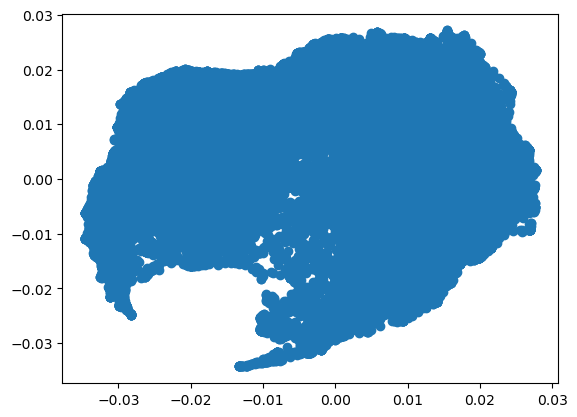

In [28]:
plt.figure()
plt.scatter(data_phate[:,0], data_phate[:,1])
plt.show()

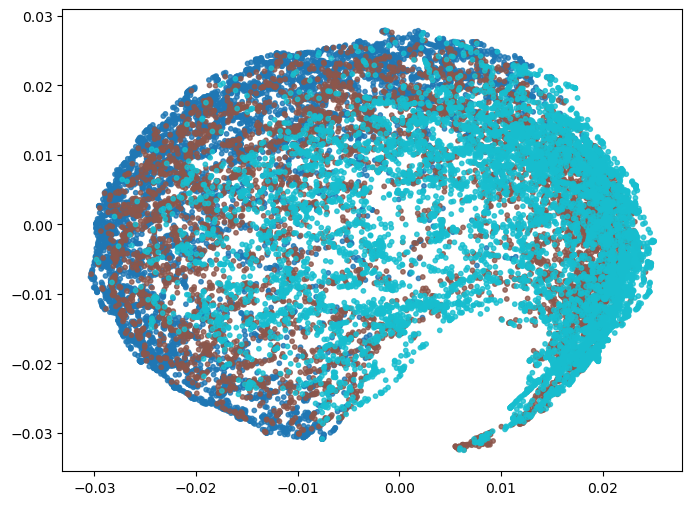

In [29]:
# Extract labels from the 'timepoint' column
labels = datapoint_selection['timepoint'].values

# If timepoint is categorical or string, convert to numerical codes
label_categories = pd.Categorical(labels)
color_codes = label_categories.codes  # For coloring
unique_labels = label_categories.categories  # For legend

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_phate_1[:, 0], data_phate_1[:, 1],
    c=color_codes,
    cmap='tab10',
    s=10,
    alpha=0.8
)

plt.show()

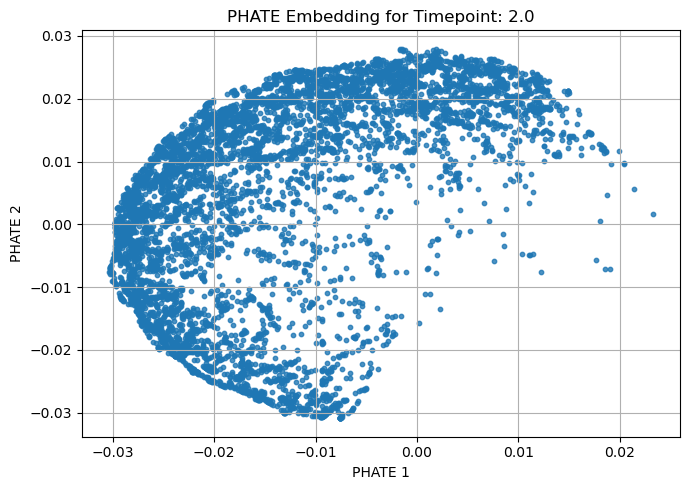

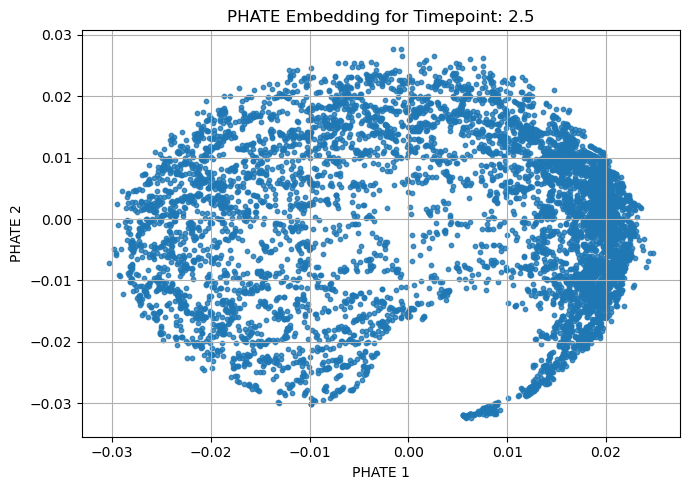

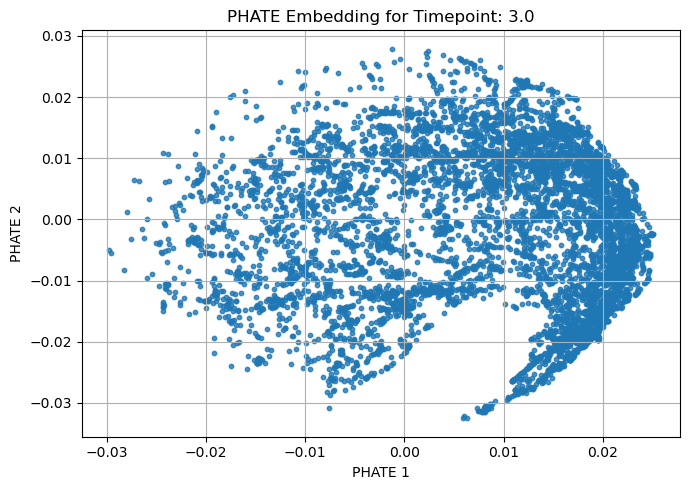

In [31]:
# Get unique timepoints
timepoints = datapoint_selection['timepoint'].unique()

# Loop through each timepoint and plot separately
for timepoint in timepoints:
    # Boolean mask to filter data
    mask = datapoint_selection['timepoint'] == timepoint
    phate_subset = data_phate_1[mask]

    # Plot
    plt.figure(figsize=(7, 5))
    plt.scatter(
        phate_subset[:, 0], phate_subset[:, 1],
        s=10,
        alpha=0.8,
        c='tab:blue'
    )
    plt.title(f"PHATE Embedding for Timepoint: {timepoint}")
    plt.xlabel("PHATE 1")
    plt.ylabel("PHATE 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()